http://chrisalbon.com/python/pandas_dataframe_load_xls.html

PDD & Profil Data exported from omnipro.

Step by step Scan: 

•	60mm to -0.5mm depth: 0.5mm step size, 15mm/s speed, 1s meas time, 

•	350mm to 50mm depth: 2mm step size, 15 or 20mm/s speed, 0.5s meas time

Resample the deep dose profile to 1mm and join the two plots together. 

OMNIPRO - if multiple tables are selected for export, x,y,z coordinate info is lost and data is sampled at 1mm. Export traces individually to keep coordinate data, e.g. if higher at higher or lower sample than 1mm.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate

In [2]:
pwd

'C:\\Users\\RCole02.ROYALSURREY\\Desktop\\GitHub\\Useful-python-for-medical-physics\\Experiments in ipython notebooks\\Omnipro\\Loading omnipro data'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'archive',
 'data',
 'files.txt',
 'Omnipro data ANALYSIS v1 5-1-2017.ipynb',
 'Omnipro data load v2 3-1-2017.ipynb']

In [4]:
# whats in the data folder
data = os.listdir('data/')  
data   # returns a list of the contents of data folder

['6MV 100FSD PROFILE (PDD JUNE - RAW).csv',
 'LA6(2015) 6MV 100FSD PDD microDiamond_ALL- RC edit.csv',
 'Microdiamond_6MV_raw_RC_from_June.xlsx']

## Plot raw data

Note: normalised to PDD max = 100%

In [5]:
data_path = 'data/' + data[2]   # load zeroth file in data
print(data_path)
HL_data = pd.ExcelFile(data_path)

data/Microdiamond_6MV_raw_RC_from_June.xlsx


In [6]:
HL_data.sheet_names

['High', 'Low']

In [7]:
High_df = HL_data.parse('High',  index_col=0)  #   # is reading in the whole file  , 
Low_df = HL_data.parse('Low', index_col=0)

In [8]:
High_df.max()

Dose_pct    100.07
dtype: float64

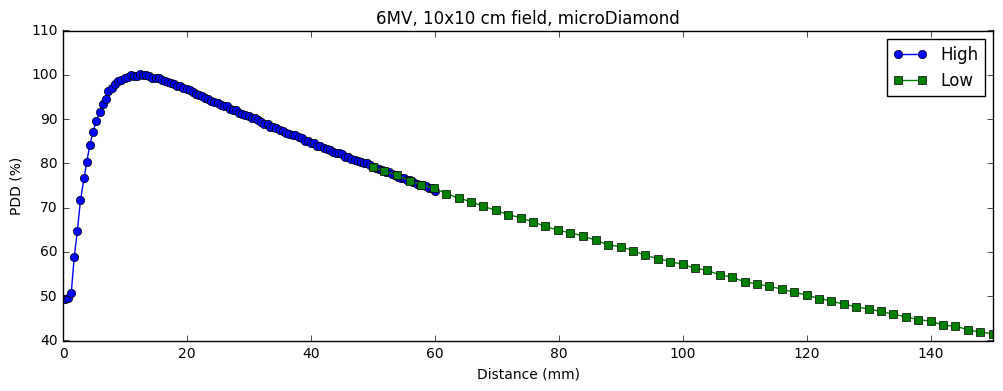

In [9]:
fig_width = 12
fig_height = 4
plt.figure(figsize=(fig_width,fig_height))

plt.plot(High_df, label='High', marker='o')
plt.plot(Low_df, label='Low', marker='s')

plt.xlim(0, 150)
plt.ylim(40, 110)
plt.title('6MV, 10x10 cm field, microDiamond')
plt.ylabel('PDD (%)')
plt.xlabel('Distance (mm)')
plt.legend()

In [10]:
High_low_concat = pd.concat([High_df, Low_df], axis=0).sort_index().dropna()  # join the two arrays, drop the NAN
x = High_low_concat.index.values
y = High_low_concat['Dose_pct'].values
f = interpolate.interp1d(x, y)   # returns an interpolate function

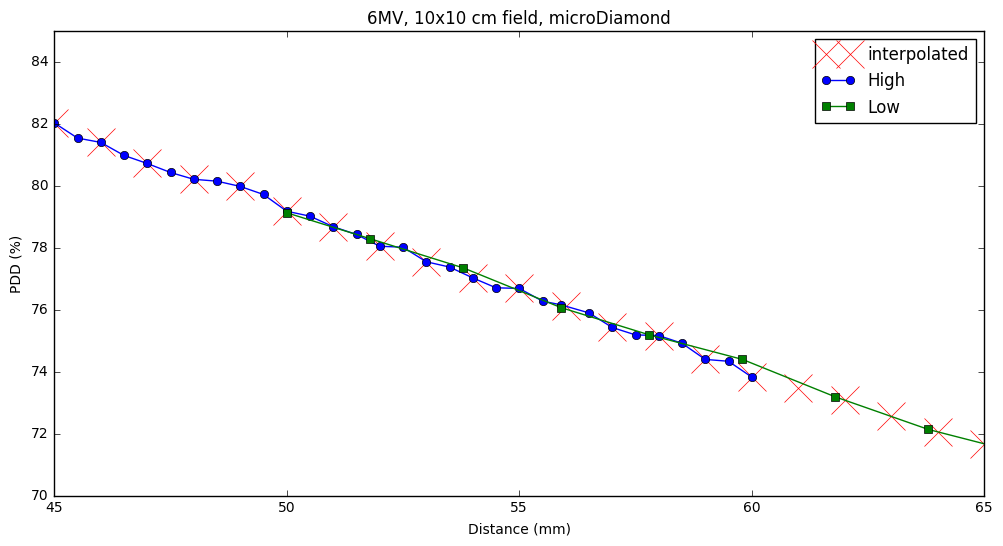

In [11]:
xnew = np.arange(0, 349)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

fig_width = 12
fig_height = 6
plt.figure(figsize=(fig_width,fig_height))

plt.plot(xnew, ynew, color='red', marker='x', markersize = 20, label='interpolated', linestyle='')

plt.plot(High_df, label='High', marker='o')

plt.plot(Low_df, label='Low', marker='s')
plt.xlim(45, 65)
plt.ylim(70, 85)

plt.title('6MV, 10x10 cm field, microDiamond')
plt.ylabel('PDD (%)')
plt.xlabel('Distance (mm)')
plt.legend()

# Plot all PDD data

Note this is the data that was processed by james, PDD normalised to 100% at 5 cm.

In [12]:
load_csv = 'LA6(2015) 6MV 100FSD PDD microDiamond_ALL- RC edit.csv'  # edited scan type, makes multi-index work
data_path = 'data/' + load_csv  #  data[1]   # hard code for fail safe

In [13]:
PDD = pd.read_table(data_path, sep= ",", index_col=0, header=[1,4], skiprows=[5,6]); # comma for csv

In [14]:
fields = PDD.columns.levels[1]
print(fields)
print(len(fields))

Index(['10 x 10 mm', '100 x 100 mm', '120 x 120 mm', '140 x 140 mm',
       '20 x 20 mm', '220 x 220 mm', '30 x 30 mm', '300 x 220 mm',
       '40 x 40 mm', '5 x 5 mm', '60 x 60 mm', '80 x 80 mm'],
      dtype='object', name='Fieldsize:')
12


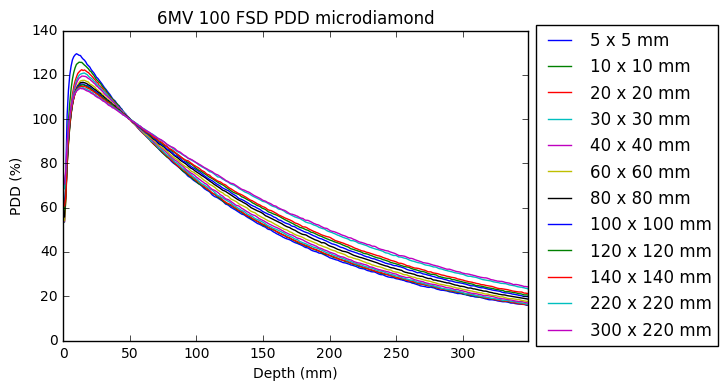

In [15]:
ax = PDD['Joined'].plot()

ax.set_xlabel('Depth (mm)')
ax.set_ylabel('PDD (%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('6MV 100 FSD PDD microdiamond')

## Analyse omnipro 10x10 cm PDD data 

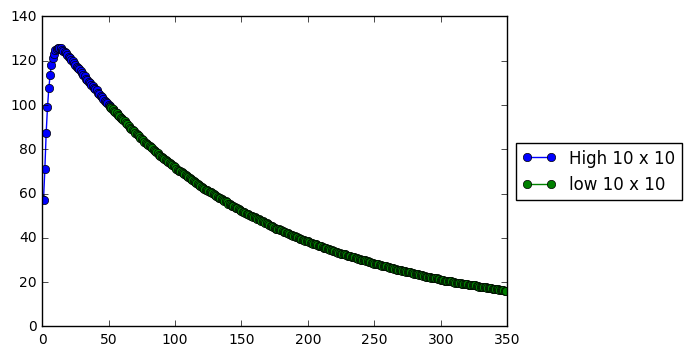

In [16]:
fig_width = 12
fig_height = 4

high10 = PDD['High']['10 x 10 mm']
low10 = PDD['Low']['10 x 10 mm']

plt.plot(high10, label = 'High 10 x 10', marker='o')
plt.plot(low10, label = 'low 10 x 10', marker='o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
xmin=30
xmax=70
#plt.xlim( xmin, xmax )

Recreate the RESAMPLED trace.
Concat the two differently sampled data, sort on index, then interpolate on linear spacing

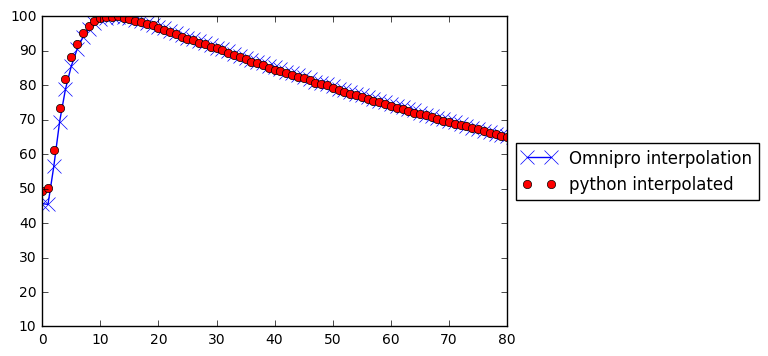

In [17]:
joined10 = PDD['Joined']['10 x 10 mm']
plt.plot(100*joined10/joined10.max(), color='blue', marker='x', markersize = 10, label = 'Omnipro interpolation') ;  # Jamses resampled

plt.plot(xnew, 100*ynew/ynew.max(), color='red', marker='o', label='python interpolated', linestyle='')

plt.xlim( 0,80 ) 
#plt.ylim( [90,110] ) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


## Now profile data

In [18]:
# pd.read_table('6MV 100FSD PROFILE (PDD JUNE - RAW).csv', sep= ",").ix[:8] # see raw header

In [20]:
PROFILE = pd.read_table('data/6MV 100FSD PROFILE (PDD JUNE - RAW).csv', sep= ",", index_col=0, header=[1,4,5], skiprows=[6]); # comma for csv
PROFILE.head()

Scan Type:        Crossline                       Inline                  
Fieldsize:       60 x 60 mm                   60 x 60 mm                  
Depth:              15.0 mm 100.0 mm 350.0 mm    15.0 mm 100.0 mm 350.0 mm
Coordinate [mm]:                                                          
-90                     NaN      NaN      1.3        NaN      NaN      1.3
-89                     NaN      NaN      1.2        NaN      NaN      1.3
-88                     NaN      NaN      1.2        NaN      NaN      1.2
-87                     NaN      NaN      1.2        NaN      NaN      1.3
-86                     NaN      NaN      1.4        NaN      NaN      1.3

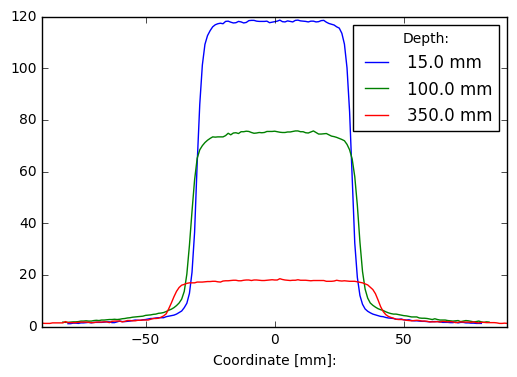

In [21]:
PROFILE['Crossline', '60 x 60 mm'].plot();